In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('../Data/ChildrenAllergyDemographics/food-allergy.csv')

In [3]:
df.head(3)

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0


In [4]:
df.nunique()

SUBJECT_ID                 333200
BIRTH_YEAR                     30
GENDER_FACTOR                   2
RACE_FACTOR                     5
ETHNICITY_FACTOR                2
PAYER_FACTOR                    2
ATOPIC_MARCH_COHORT             2
AGE_START_YEARS              6480
AGE_END_YEARS                6573
SHELLFISH_ALG_START          3565
SHELLFISH_ALG_END             952
FISH_ALG_START               1482
FISH_ALG_END                  489
MILK_ALG_START               2791
MILK_ALG_END                 1844
SOY_ALG_START                1561
SOY_ALG_END                   949
EGG_ALG_START                2439
EGG_ALG_END                  1681
WHEAT_ALG_START               915
WHEAT_ALG_END                 566
PEANUT_ALG_START             3754
PEANUT_ALG_END               1486
SESAME_ALG_START              698
SESAME_ALG_END                172
TREENUT_ALG_START               1
TREENUT_ALG_END                 0
WALNUT_ALG_START              668
WALNUT_ALG_END                164
PECAN_ALG_STAR

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non-null    float64
 14  MILK

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


In [6]:
d = {'S1 - Female': False, 'S0 - Male': True}
df.GENDER_FACTOR = df.GENDER_FACTOR.map(d)
df.RACE_FACTOR = df.RACE_FACTOR.astype('category')
df.ETHNICITY_FACTOR = df.ETHNICITY_FACTOR.astype('category')
d = {'P1 - Medicaid': True, 'P0 - Non-Medicaid':False}
df.PAYER_FACTOR = df.PAYER_FACTOR.map(d)

## Allergen Counts

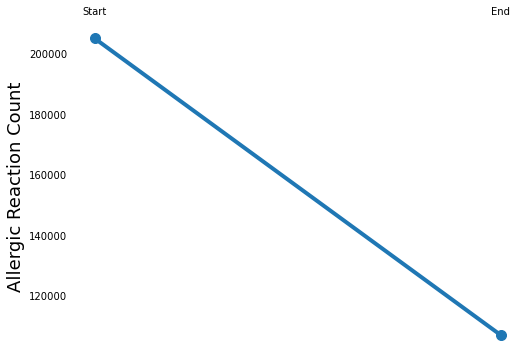

In [132]:
l = ['SHELLFISH_ALG_START','FISH_ALG_START','MILK_ALG_START','SOY_ALG_START','EGG_ALG_START','WHEAT_ALG_START','PEANUT_ALG_START','SESAME_ALG_START','TREENUT_ALG_START',
'WALNUT_ALG_START','PECAN_ALG_START','PISTACH_ALG_START','ALMOND_ALG_START','BRAZIL_ALG_START','HAZELNUT_ALG_START','CASHEW_ALG_START','ATOPIC_DERM_START','ALLERGIC_RHINITIS_START','ASTHMA_START']
l_end = ['SHELLFISH_ALG_END','FISH_ALG_END','MILK_ALG_END','SOY_ALG_END','EGG_ALG_END','WHEAT_ALG_END','PEANUT_ALG_END','SESAME_ALG_END','TREENUT_ALG_END',
'WALNUT_ALG_END','PECAN_ALG_END','PISTACH_ALG_END','ALMOND_ALG_END','BRAZIL_ALG_END','HAZELNUT_ALG_END','CASHEW_ALG_END','ATOPIC_DERM_END','ALLERGIC_RHINITIS_END','ASTHMA_END']
alg_start = 0
alg_end = 0


plt.figure(figsize=(8,6))
for i in range(len(l)):
    alg_start += df[l[i]].count()
    alg_end += df[l_end[i]].count()
plt.plot(['Start', 'End'], [alg_start, alg_end], linewidth='4',marker='.', markersize='20')
plt.box(False)
plt.ylabel('Allergic Reaction Count', fontsize=18)
plt.tick_params(left=False, bottom=False)
plt.tick_params(axis='both', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

In [133]:
allergen = ['SHELLFISH','FISH','MILK','SOY','EGG','WHEAT','PEANUT','SESAME','TREENUT',
'WALNUT','PECAN','PISTACH','ALMOND','BRAZIL','HAZELNUT','CASHEW','DERM','RHINITIS','ASTHMA']

In [134]:
# pd.DataFrame([df[l].describe().loc['count'],df[l_end].describe().loc['count']]).T

s1 = df[l].describe().loc['count']
s1.index = allergen
s2 = df[l_end].describe().loc['count']
s2.index = allergen
series = [s1, s2]
final_cnt = pd.concat([s1, s2], axis=1, keys=['START', 'END'])
final_cnt['PCT_CNG'] = ((final_cnt['START'] - final_cnt['END'])/final_cnt['START']) * -100

In [135]:
final_cnt

,START,END,PCT_CNG
SHELLFISH,5246.0,1051.0,-79.965688
FISH,1796.0,527.0,-70.657016
MILK,7289.0,4580.0,-37.165592
SOY,2419.0,1431.0,-40.843324
EGG,6065.0,3293.0,-45.704864
WHEAT,1146.0,688.0,-39.965096
PEANUT,8653.0,2092.0,-75.823414
SESAME,766.0,178.0,-76.762402
TREENUT,1.0,0.0,-100.000000
WALNUT,704.0,166.0,-76.420455


<div style="color:white;display:fill;border:15px;
                           background-color:#000000;text-align:center;font-size:120%;
                           font-family:sans-serif;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;">
        <b>Takeaway</b>
    </p>
</div>

* Reported allergen count went down by the end of the study. 
* Every allergen saw a sizable reduction in reportings, with the lowest reduction being around 15%

## Age and Allergies
Given the substantial reduction over the course of the study, we must ask ourselves a few questions;
* Average Age of a given allergy
* Allergy Distribution

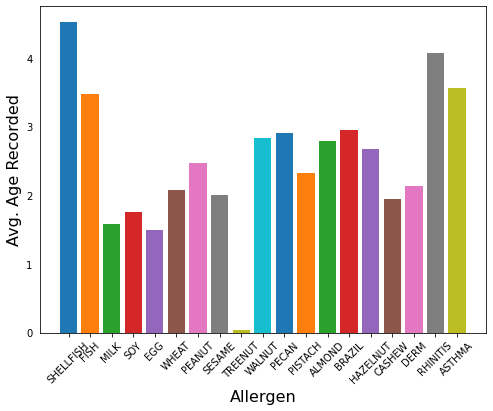

In [136]:
alg_mask = df[l].notnull().T.any()
plt.figure(figsize=(8,6))
for idx, c in enumerate(l):
    plt.bar(allergen[idx],df[df[c].notnull()]['AGE_START_YEARS'].mean())
plt.ylabel('Avg. Age Recorded', fontsize=16)
plt.xlabel('Allergen', fontsize=16)
plt.xticks(rotation=45)
plt.tick_params(left=False, bottom=False)
plt.tick_params(axis='both', labelsize=10, labelbottom = True, bottom=True, top = False)
plt.show()

<div style="color:white;display:fill;border:15px;
                           background-color:#C54E57;text-align:center;font-size:120%;
                           font-family:sans-serif;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;">
        <b>Important!</b>
         Keep in mind the average age of a child entering the study is registered as; <b>3.94</b>
    </p>
</div>
<div style="color:black;border:5px'">
While we know that overall the allergen reporting of children in the study trends downward, we must also investigate correlations between age/developmental phase and allergens.
</div>

#### NCBI's development stages;

* Infancy (neonate and up to one year age)
* Toddler ( one to five years of age)
* Childhood (three to eleven years old) - early childhood is from three to eight years old, and middle childhood is from nine to eleven years old. 
* Adolescence or teenage (from 12 to 18 years old)
* Adulthood

In [137]:
bins = ['Infancy', 'Toddler', 'Early', 'Middle', 'Adolescence']

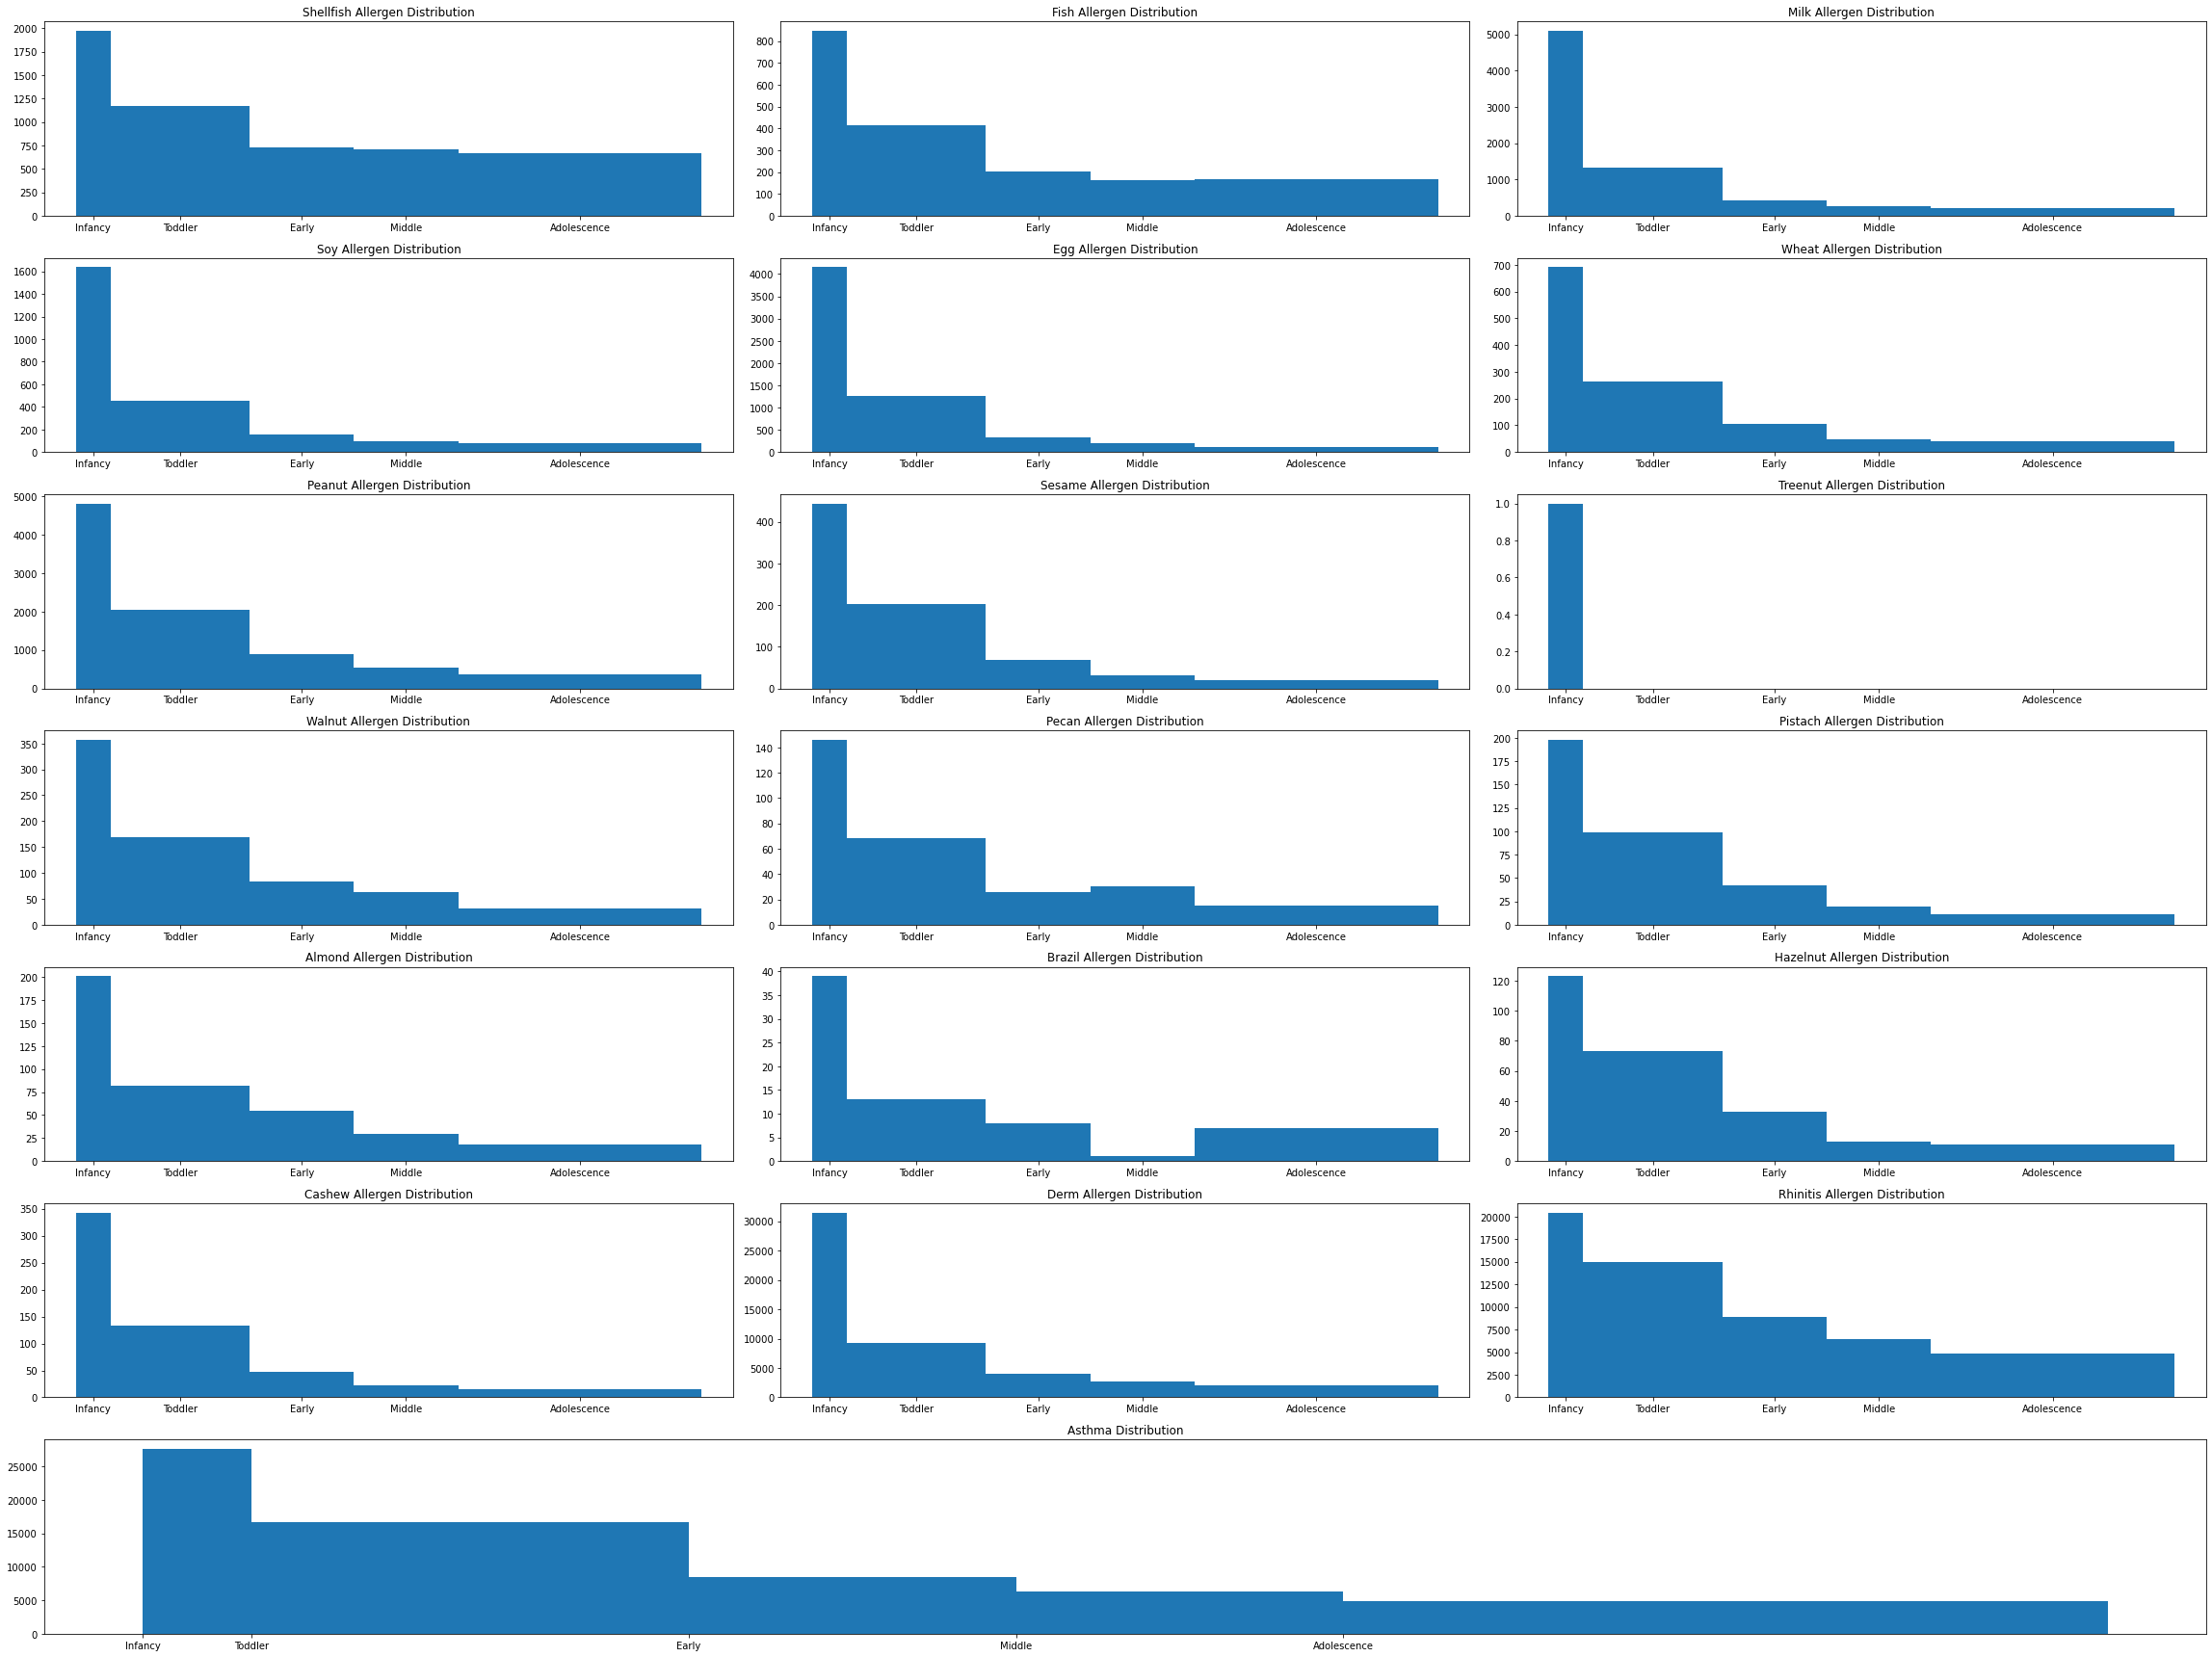

In [172]:
fig, axs = plt.subplots(7,3, figsize=(32,24))
axs = axs.flatten()
for idx, c in enumerate(l):
    if idx == 18:
        break
    axs[idx].hist(df[df[c].notnull()]['AGE_START_YEARS'], bins=[0, 1, 5, 8, 11, 18])
    axs[idx].title.set_text(f'{allergen[idx].title()} Allergen Distribution')
    axs[idx].set_xticks([0, 1, 5, 8, 11])
    mids = [rect.get_x() + rect.get_width() / 2 for rect in axs[idx].patches]
    axs[idx].set_xticks(mids)
    axs[idx].set_xticklabels(bins)

plt.subplot(717)
plt.title('Asthma Distribution')
plt.hist(df[df['ASTHMA_START'].notnull()]['AGE_START_YEARS'], bins=[0, 1, 5, 8, 11, 18])
plt.xticks([0,1,5,8,11], labels=bins)
plt.tight_layout()
plt.show()

In [140]:
# Next steps
# Find avg age of child growing out of allergen
# Find avg age of child who doesn't grow out of allergen

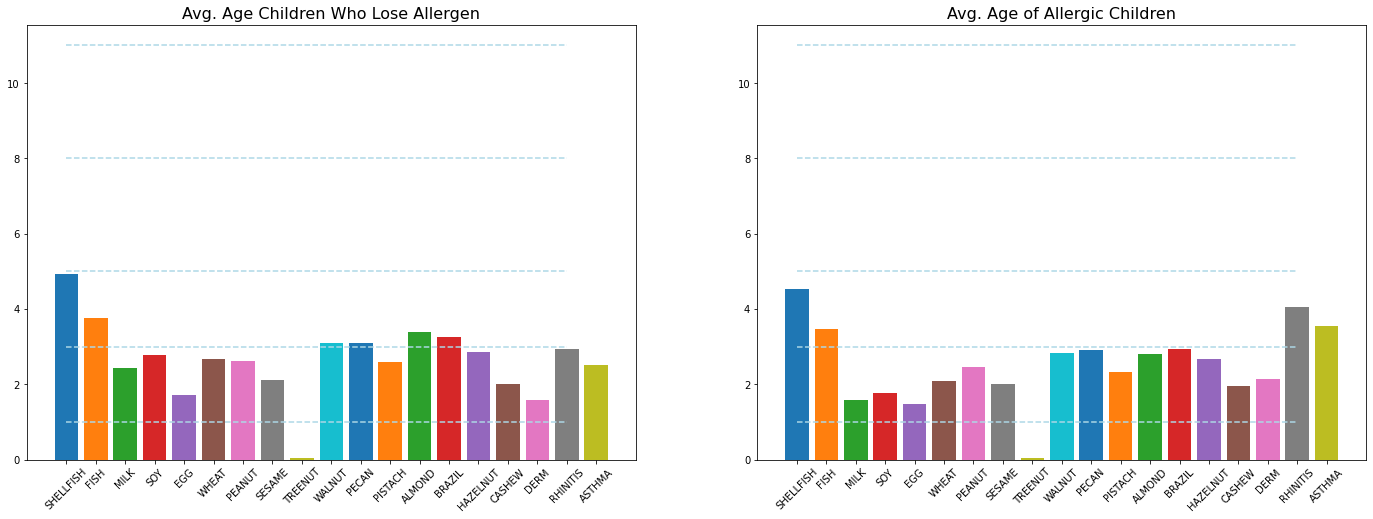

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(24,8))
l2, l3 = [],[]
for idx, c in enumerate(l):
    _ = df[df[l[idx]].notnull() & df[l_end[idx]].isnull()]
    l3.append(_['AGE_START_YEARS'].mean())
    axs[0].bar(allergen[idx],l3[idx])
for idx, c in enumerate(l):
    l2.append(df[df[c].notnull()]['AGE_START_YEARS'].mean())
    axs[1].bar(allergen[idx],l2[idx])
    
axs[0].hlines([1, 3, 5, 8, 11], 'SHELLFISH', 'RHINITIS', linestyle = '--', color='lightblue', label = 'Development Stages')
axs[1].hlines([1, 3, 5, 8, 11], 'SHELLFISH', 'RHINITIS', linestyle = '--', color='lightblue', label = 'Development Stages')

axs[0].set_title('Avg. Age Children Who Lose Allergen', fontsize=16)
axs[0].tick_params(axis='x', labelrotation = 45)
axs[1].set_title('Avg. Age of Allergic Children', fontsize=16)
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_ylim(axs[0].get_ylim())
plt.show()

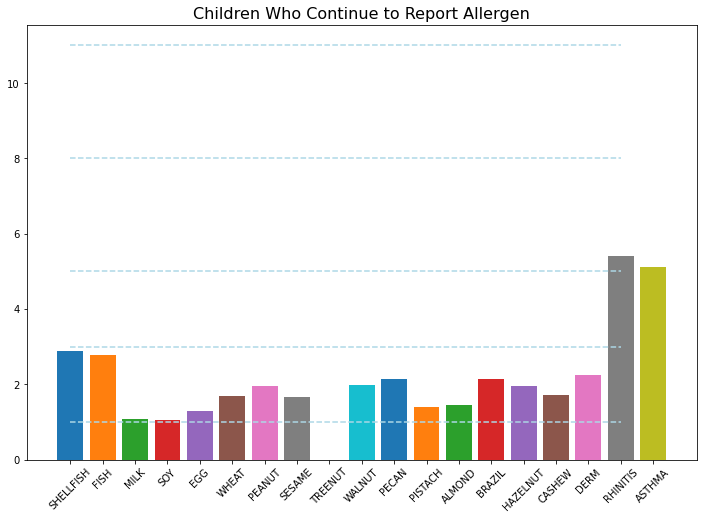

In [142]:
fig, axs = plt.subplots(1,1, figsize=(12,8))
l1 = []
for idx, c in enumerate(l):
    _ = df[df[l[idx]].notnull() & df[l_end[idx]].notnull()]
    l1.append(_['AGE_START_YEARS'].mean())
    axs.bar(allergen[idx],l1[idx])
axs.hlines([1, 3, 5, 8, 11], 'SHELLFISH', 'RHINITIS', linestyle = '--', color='lightblue', label = 'Development Stages')
plt.title('Children Who Continue to Report Allergen', fontsize=16)
axs.tick_params(axis='x', labelrotation=45)

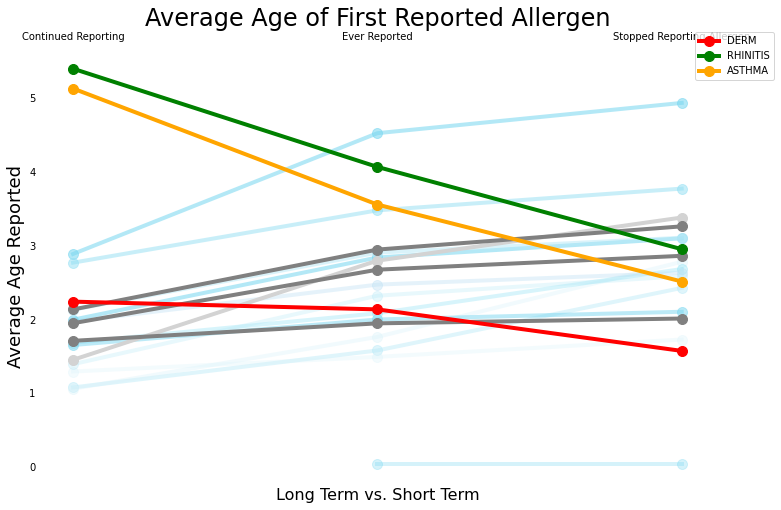

In [177]:
# _ = df[df[l[0]].notnull()][df[l_end[0]].isnull()]
# _['AGE_START_YEARS'].mean()
cmap = ['#7AD7F090', '#92DFF380', '#B7E9F770', '#DBF3FA60','#DBF3FA50', '#80DFF350', '#BBDFF360', '#7AD7F080','#7AD7F050', '#7AD7F090', '#B7E9F780', '#B7E9F750','lightgrey', 'grey', 'grey', 'grey','Red', 'Green', 'Orange']
alpha = [.5,.5,.5,.5,.5,.5,.5,.5,.5,.5,.5,.5,.5,.5,.5,.5,1,1]
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(['Continued Reporting', 'Ever Reported', 'Stopped Reporting Allergen'], [l1, l2, l3], linewidth='4',marker='.', markersize='20')
plt.box(False)
plt.ylabel('Average Age Reported', fontsize=18)
plt.tick_params(left=False, bottom=False)
for idx,line in enumerate(ax.lines):
    line.set_color(cmap[idx])
    if idx < 16:
        line.set_label('')
    else:
        line.set_label(allergen[idx])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tick_params(axis='both', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.title('Average Age of First Reported Allergen', fontsize=24)
plt.xlabel('Long Term vs. Short Term', fontsize=16)
plt.show()
fig.savefig('Images/line.png')

In [191]:
mask = df[l].notnull().T.any()
df[mask][l].count()

SHELLFISH_ALG_START         5246
FISH_ALG_START              1796
MILK_ALG_START              7289
SOY_ALG_START               2419
EGG_ALG_START               6065
WHEAT_ALG_START             1146
PEANUT_ALG_START            8653
SESAME_ALG_START             766
TREENUT_ALG_START              1
WALNUT_ALG_START             704
PECAN_ALG_START              285
PISTACH_ALG_START            369
ALMOND_ALG_START             386
BRAZIL_ALG_START              68
HAZELNUT_ALG_START           253
CASHEW_ALG_START             561
ATOPIC_DERM_START          49515
ALLERGIC_RHINITIS_START    55567
ASTHMA_START               63874
dtype: int64

<div style="color:white;display:fill;border:15px;
                           background-color:#000000;text-align:center;font-size:120%;
                           font-family:sans-serif;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;">
        <b>Takeaway</b>
    </p>
</div>Here we can see that the gradual decrease in allergen reporting tends to fall into one of two categories. 

* Younger initial reporting implies a higher likelyhood of presistence. This is the majority category.
* Higher age at initial reporting implies a higher likelyhood of persistence. Only the categories of Dermititis, Rhinitis and, Asthma follow this trend.

While these trends may appear significant, the vast overreporting of Dermititis, Rhinitis and, Asthma, leaves them speculative.